# Libraries & Data

In [5]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.impute import SimpleImputer;
from sklearn.compose import ColumnTransformer;
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import LogisticRegression;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.svm import SVR;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.tree import DecisionTreeRegressor;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.neighbors import KNeighborsRegressor;
from sklearn.naive_bayes import GaussianNB;
import xgboost as xgb;
from xgboost import XGBClassifier;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor

In [1]:
import pandas as pd;
train = pd.read_csv('../input/machinehack-financial-risk-prediction/Train.csv');
test =pd.read_csv('../input/machinehack-financial-risk-prediction/Test.csv');
ss = pd.read_csv('../input/machinehack-financial-risk-prediction/Sample_Submission.csv')

In [3]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


# Visualization

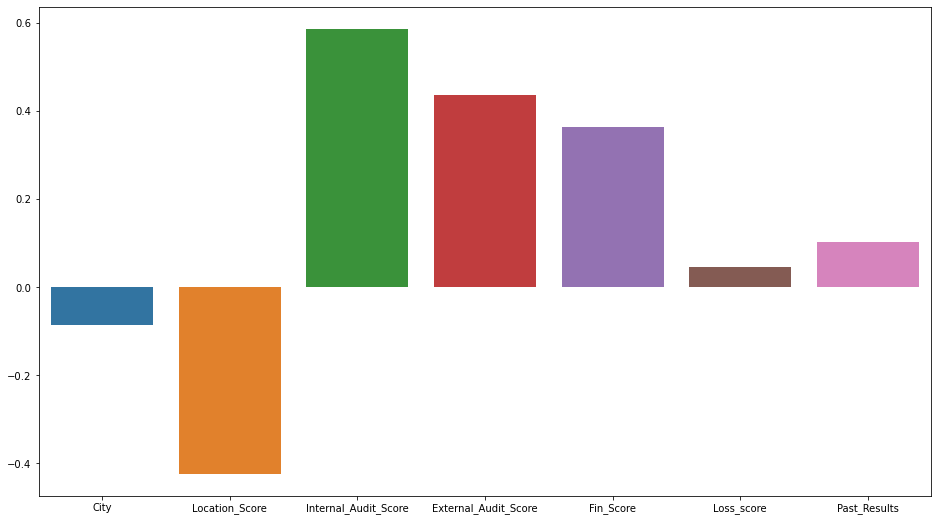

In [6]:
plt.figure(figsize = (16,9))
fineTech_appData3 = train.drop(['IsUnderRisk'], axis = 1)
sns.barplot(fineTech_appData3.columns,fineTech_appData3.corrwith(train['IsUnderRisk']))



# Train Test Split

In [8]:
x = train[['Location_Score', 'Internal_Audit_Score', 'External_Audit_Score',
       'Fin_Score']];
y = train[['IsUnderRisk']]

In [29]:
newtest  = test[['Location_Score', 'Internal_Audit_Score', 'External_Audit_Score',
       'Fin_Score']]

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 55)

# Modeling

In [10]:
xx = XGBRegressor();
xx.fit(xtrain, ytrain);
xx.score(xtest, ytest)

0.3553216857453064

In [11]:
rfc = RandomForestRegressor();
rfc.fit(xtrain, ytrain);
rfc.score(xtest, ytest)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.45869257246376827

In [15]:
knn = KNeighborsRegressor();
knn.fit(xtrain, ytrain);
knn.score(xtest, ytest)

0.28123188405797117

In [28]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators= 20)
lgb.fit(xtrain,ytrain);
lgb.score(xtest, ytest)

0.4650576617161536

# Prediction

In [ ]:
model = lgb.predict(newtest);
modelData = pd.DataFrame(model, columns = ['IsUnderRisk']);
modelData.set_index('IsUnderRisk').to_csv('submission.csv')